In [1]:
# import necessary libraries

# loading and reading data
import numpy as np
import pandas as pd

# libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Library for splitting data
from sklearn.model_selection import train_test_split

from pycaret.classification import *



# library for scaling
from sklearn.preprocessing import StandardScaler

# library to encode categorical data
from sklearn.preprocessing import LabelEncoder

#Library for traditional models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#library for deep neural network models
from keras.models import Sequential
#from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
#from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# library for hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from scipy.stats import randint, uniform

# library for data augmentation
from imblearn.over_sampling import SMOTE

# library for result evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc , roc_curve, roc_auc_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import FunctionTransformer

from scipy.stats import boxcox

# Others
from sklearn.preprocessing import label_binarize
import time
import warnings

In [2]:
# load the data set(maternal_health data)

df = pd.read_csv('Maternal Health Risk Data Set.csv')


In [3]:
# Check the first 5 columns of the data set
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Data Features explanation
|Feature	|Description	                                                                    |Unit      |
|-----------|-----------------------------------------------------------------------------------|----------|
|Age	    |Ages in years when a woman is pregnant	                                            |          |
|SystolicBP	|Upper value of Blood Pressure                                                      |mmHg      |
|DiastolicBP|Lower value of Blood Pressure	                                                    |mmHg      |
|BS	        |Blood glucose levels is in terms of a molar concentration	                        |mmol/L    |
|BodyTerm	|Bodytemperature	                                                                |Fahrenheit|
|HeartRate	|A normal resting heart rate	                                                    |bpm       |
|RiskLevel	|Predicted Risk Intensity Level during pregnancy considering the previous attribute |          |	


## 1. Data Overview

- Data Stucture
- Data Quality check
- Data Descriptive analysis

### 1.1 Data Structure

| Task           | Objective                                             |
|----------------|-------------------------------------------------------|
| Data Dimension | To know the number of columns and rows of the dataset |
| Data Types     | To verify that the data types align with the features |
| Data Columns   | To list and understand the columns                    |


In [4]:
# checking the dimensionality of the data set
print(f" Data set Dimensions: {df.shape}")

print('---------------------------------------')
# Checking the data types
print(f" Data types:\n{df.dtypes}")

print('----------------------------------------')
# check the data columns
print(f" Data columns: {df.columns}")


 Data set Dimensions: (1014, 7)
---------------------------------------
 Data types:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object
----------------------------------------
 Data columns: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


### 1.2 Data Quality Check


In [5]:
# check for missing value
print(f"missing value: {df.isnull().sum()}")

missing value: Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


***Observation***: No missing value exist in our data

### 1.3 Data descriptive analysis

| Task                             | Objective                                                                          |
|----------------------------------|------------------------------------------------------------------------------------|
|statistics of numerical features  | quick overview of the distribution and central tendencies of the numerical features|
|statistics of categorical features| understand class distribution of categorical variable                              |

In [6]:
# check the summary statistics of numerical features
print('The summary Statistics of numerical features:')
df.describe().T

The summary Statistics of numerical features:


,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


***Observations on the statistic check of the numerical data***
The minimum heart rate is 7 and the maximum is 70. It is biologically impossible to have a heart rate of 7. According to the guiness world record, the lowest heartrate ever recorded is 27bmp. This will be considered as data inputation error. We will investigate and find the number of rows with this anomaly and treat accordingly

In [7]:
# check the number of entries with the heart rate anomaly
hrt_anomaly = df[(df['HeartRate'] >= 7) & (df['HeartRate'] <= 26)].shape[0]

print(f"Number of entries with heartrate between 7 and 26: {hrt_anomaly}")

Number of entries with heartrate between 7 and 26: 2


In [8]:
# Check for the mode of the HeartRate column
hrt_mode = df['HeartRate'].mode()[0]

print(f"The mode of the Heart Rate : {hrt_mode}")

The mode of the Heart Rate : 70


In [9]:
# Replace the Heart Rate anomaly with the mode

df['HeartRate'] = df['HeartRate'].replace(7, hrt_mode)



In [10]:
# check the summary statistics of the class distribution of the target variable
print(df.describe(include='object'))

# Value counts for categorical features
print("\nCategorical Data Insights:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} frequency:")
    print(df[col].value_counts())



       RiskLevel
count       1014
unique         3
top     low risk
freq         406

Categorical Data Insights:
RiskLevel frequency:
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


### 1.3.1 Further analysis on the numerical features

In [11]:
# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for col in df.select_dtypes(include=['number']).columns:
    skewness_value = round(df[col].skew(),2)
    kurtosis_value = round(df[col].kurt(),2)
    print(f"{col}: Skewness = {skewness_value}, Kurtosis = {kurtosis_value}")


Skewness and Kurtosis:
Age: Skewness = 0.78, Kurtosis = -0.39
SystolicBP: Skewness = -0.25, Kurtosis = -0.61
DiastolicBP: Skewness = -0.05, Kurtosis = -0.95
BS: Skewness = 1.87, Kurtosis = 2.3
BodyTemp: Skewness = 1.75, Kurtosis = 1.45
HeartRate: Skewness = 0.07, Kurtosis = -0.48


***Observation on Skewness***
 1) Age and PulsePressure are moderately skewed.
 2) BS and BodyTemp: positvely skewed, suggesting the presence of higher values pulling the tail of the distribution to the right
 
***Observation on Kurtosis***
 1) BS, BodyTemp: High positve kurtosis which indicates some extreme values or presence of outliers
 2) Age, SystolicBP, DiastolicBP, HeartRate,MAp, PulsePressure: Negative kurtosis which suggests a flatter distribution with minimum outliers

## 2. Encode categorical Features

- From the data type check of 1.1, its observed that the feature 'RiskLevel' is in object form. This form is not generally accepatable by all ML algorithms. We will use mapping to encode it into a numerical form for ease of intepretation by our models

In [12]:
# Mapping risk levels to numeric values
risk_map = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel_encode'] = df['RiskLevel'].map(risk_map)

## 3. Exploratory Data Analysis(EDA)
- **EDA** is a vital step in the data analysis process and it involves summarizing a dataset's main characteristics using visuals.
it's importance includes:
1) understand the data structure
2) detect patterns and anomalies
3) formuate hypothesis for further analysis

### 3.1. Univariate analysis on the target variable distribution
- **Bar plot:** to visualize the count of each class
- **Pie chart:** to visualize the percentage distribution of each class

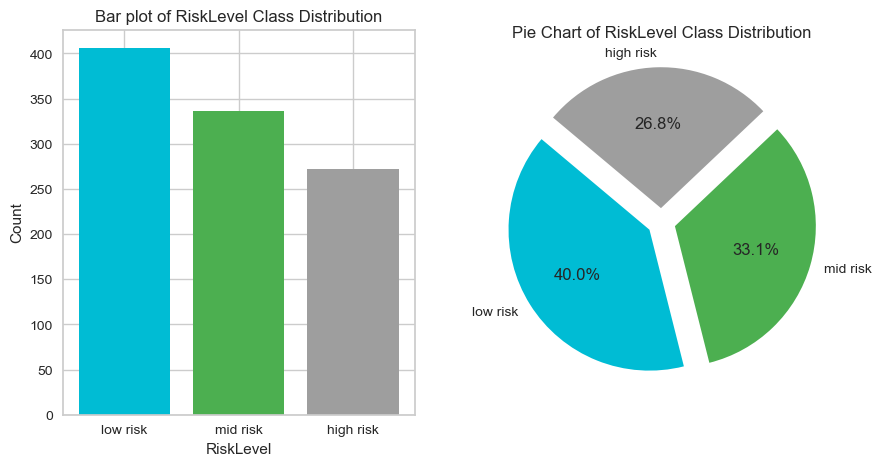

In [13]:
# Calculate the class distribution
class_dis = df['RiskLevel'].value_counts()

#create color tones
colors = ['#00bcd4', '#4caf50', '#9e9e9e']


# create subplots for bar plot and pie chart
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Bar Chart
ax[0].bar(class_dis.index, class_dis.values, color=colors)#['gray', 'darkorange', 'cornflowerblue'])
ax[0].set_title('Bar plot of RiskLevel Class Distribution')
ax[0].set_xlabel('RiskLevel')
ax[0].set_ylabel('Count')


# Pie Chart
ax[1].pie(class_dis.values, labels=class_dis.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0.1, 0.1),
          colors=colors)#['gray', 'darkorange', 'cornflowerblue'])
ax[1].set_title('Pie Chart of RiskLevel Class Distribution')

# To display plot
plt.show();

***Observation on the RiskLevel Plot***

- The above plots suggest our target variable RiskLevel has low risk of 40%, mid risk of 33.1% and high risk of 26.8%.
This clearly indicates a somwwhat class inbalance among our target variable.

### 3.3. Correlation heat map of the features
- The heatmap is used to visualize the relationship between numerical features in the dataset
- **+1.0:** indicate perfect positive relation. positive values means as one feature increases, the other tends to increase too
- **-1.0:** indicate perfect negative relation. negative values means as one feature increases, the other decrease
- **0.0:** means no relation. suggesting the features has no linear relationship(no dependence)

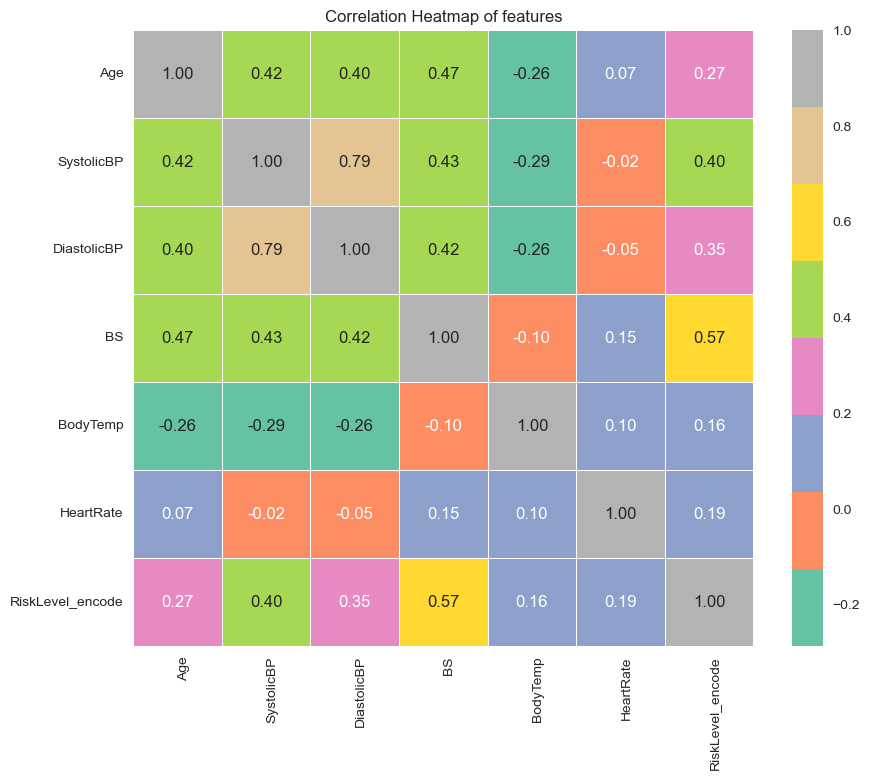

In [14]:
# Calculate the correlation matrix
corr_features = df.drop('RiskLevel', axis=1)
corr_matrix = corr_features.corr()

# set the colors for the heatmap
#custom_palette = sns.diverging_palette(30, 200, s=100, l=50, n=400, center="light")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap= 'Set2', cbar=True, linewidths=0.5)
plt.xticks(rotation=90, ha='left')
plt.title('Correlation Heatmap of features')
plt.show();



***Corelation heatmap key observations***

- All features have a positive correlation with the target variable **RiskLevel**

- **features with strong positve correlations:**
    - **SystolicBP and DiastolicBP**  
     
- **features with moderate positive correlations:**
    - **Age with SystolicBP, DiastolicBP and BS (0.47)**

- **Low correlation:**
    - **BodyTemp and HeartRate:** shows very low or no correlation with other features, suggesting independence on other features.

### 3.2. 3D of some correlated features

***Plot 1***

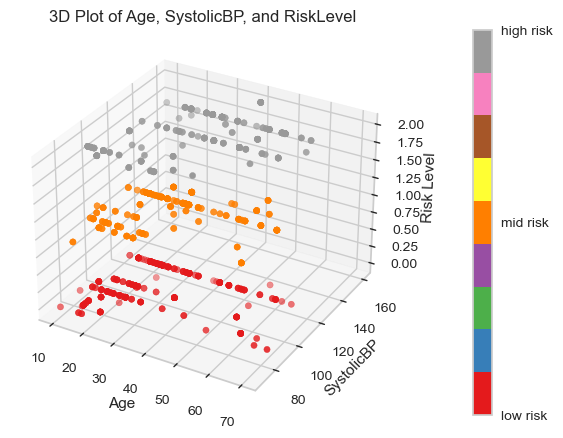

In [15]:
# Selecting features for the plot
feat1 = 'Age'
feat2 = 'SystolicBP'

# Creating the 3D plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
sc = ax.scatter(df[feat1], df[feat2], df['RiskLevel_encode'], c=df['RiskLevel_encode'], cmap='Set1', marker='o')

# Adding labels and title
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_zlabel('Risk Level')
ax.set_title('3D Plot of Age, SystolicBP, and RiskLevel')

# Adding a color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['low risk', 'mid risk', 'high risk'])

plt.show()


***Plot 2***


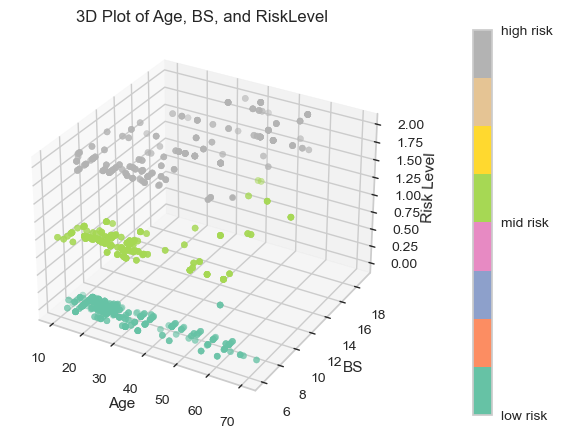

In [16]:
# additional 3D plot
feat3 = 'BS'
# Creating the 3D plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
sc = ax.scatter(df[feat1], df[feat3], df['RiskLevel_encode'], c=df['RiskLevel_encode'], cmap='Set2', marker='o')

# Adding labels and title
ax.set_xlabel(feat1)
ax.set_ylabel(feat3)
ax.set_zlabel('Risk Level')
ax.set_title('3D Plot of Age, BS, and RiskLevel')

# Adding a color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['low risk', 'mid risk', 'high risk'])

plt.show()



***Observations from plots***

Plot 1 and plot 2 shows that risk levels are spread across different ages both younger and older. It further shows that age alone is not a determinate of risk in pregnancy. Instead, the risk level seems to be influenced by a combination of age and other factors such as blood sugar and Blood pressure.
- **High Risk**: Predominantly among higher systolicBP values and also higher Blood sugar thou present across the range of ages.
- **Mid and Low Risk**: shows the same pattern with high risk. Predominant among Lower systolicBP and Blood sugar



### 3.3. Visualizing skewness using Histogram

- **Skewness** measures how evenly spread the bell curve  on data points is on both sides of the median. if the spread is tilted more to the left than the right, it is said to be negatively skew and positively skewed if tilted more to the right than to the left. The data points is said to be zero symmetric if the bell shape have an even distribution on both sides

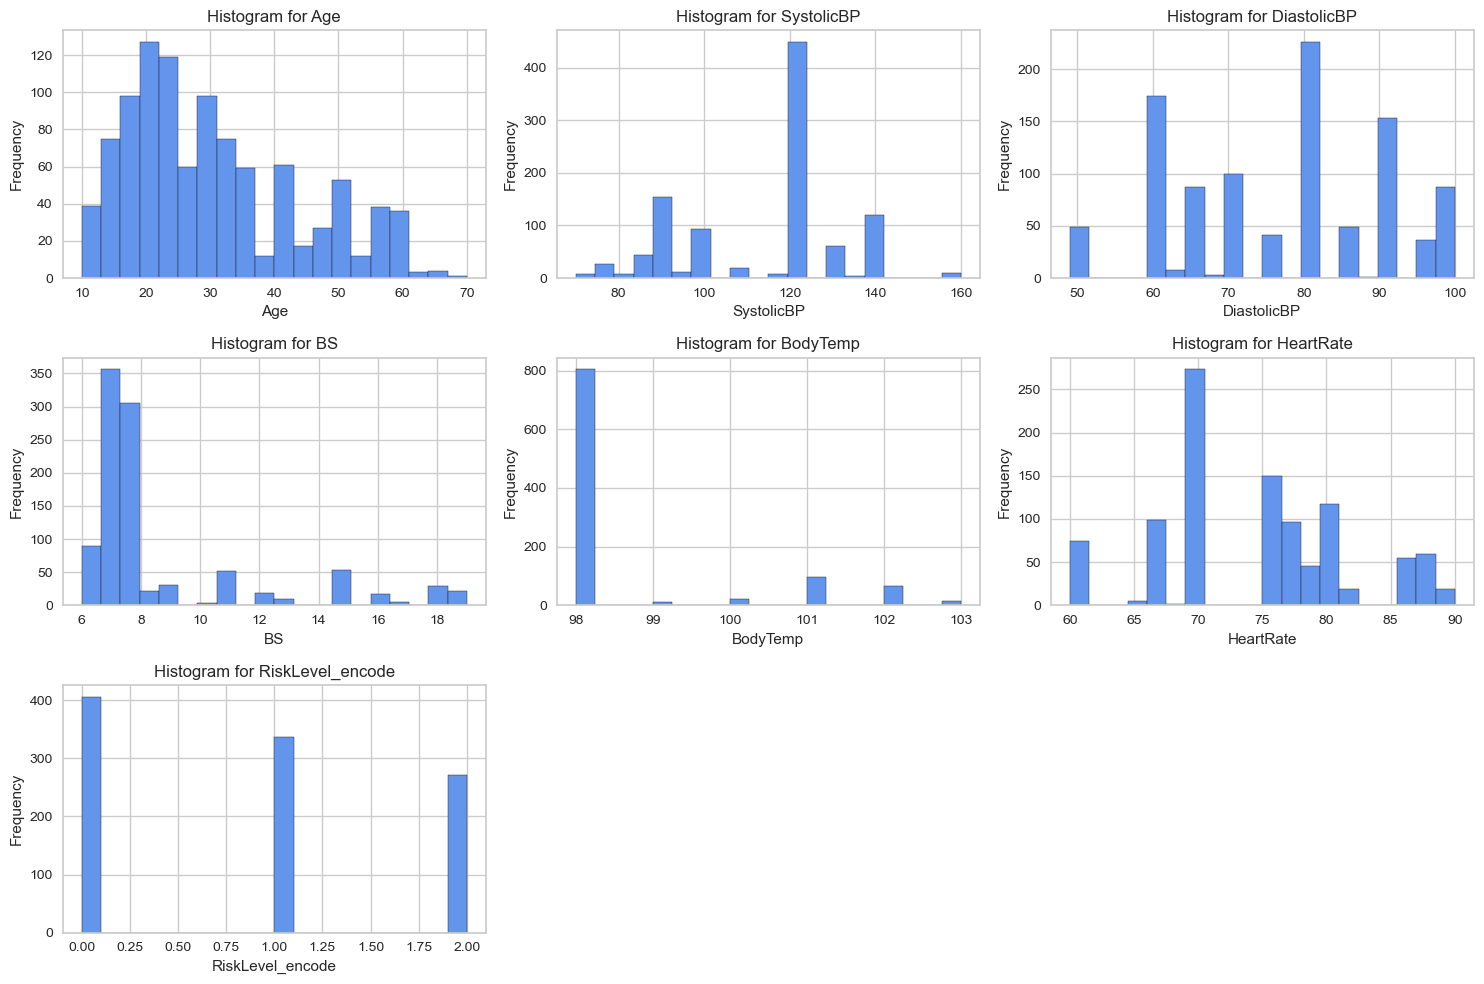

In [17]:
# Visualize skewness using histogram for each numerical feature

num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column].dropna(), bins=20, edgecolor='k', color='cornflowerblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


***Histogram Observation***


- From the above it is seen that BS and Body Temp are highly skewed. BS and Body Temp are positively skewed.Age is moderately skewed. Diastolic, systolic, and HeartRate are approximately symmetric

### 3.5. Box plot for visualizing presence of outliers

- The presence of outliers in a dataset can significantly impact model performance as extreme values or very low values can affect our model ability to classify instances and potentially leading to poor generalization and bias.

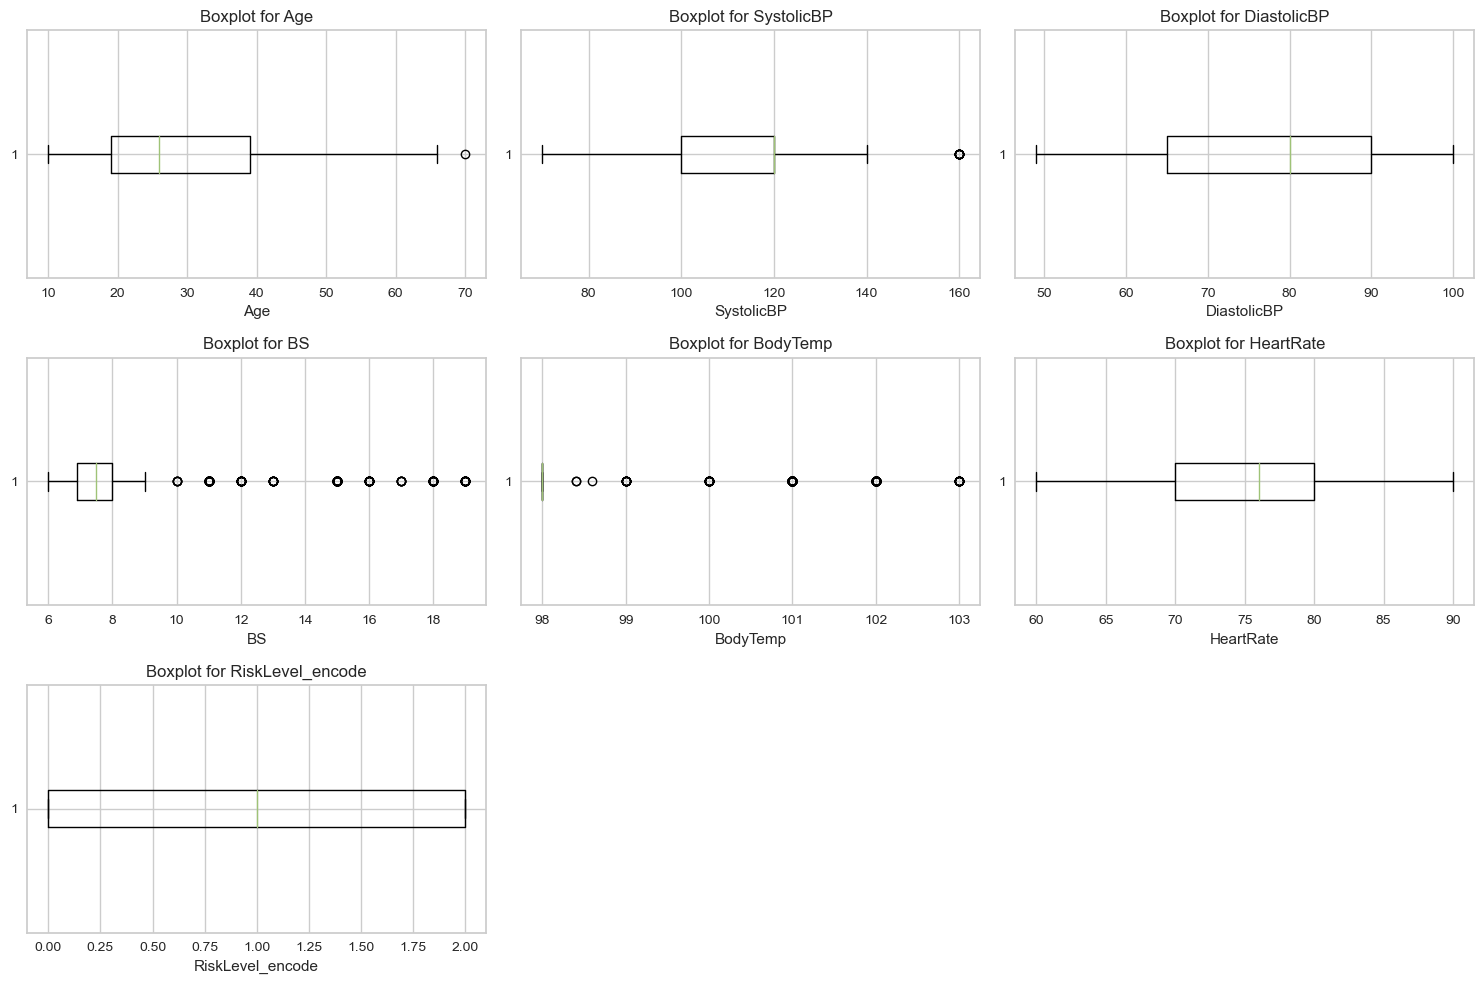

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

***Box plot observation***

- BS and BodyTemp have the highest number of outliers, indicating that they contain values that are either extremely high or extremely low compared to the concentration of other data points.

In order to overcome this, we will employ z-score standardization so as to make the distribution close to normal

### 3.4. Pairplot of some correlated features

<Figure size 1000x500 with 0 Axes>

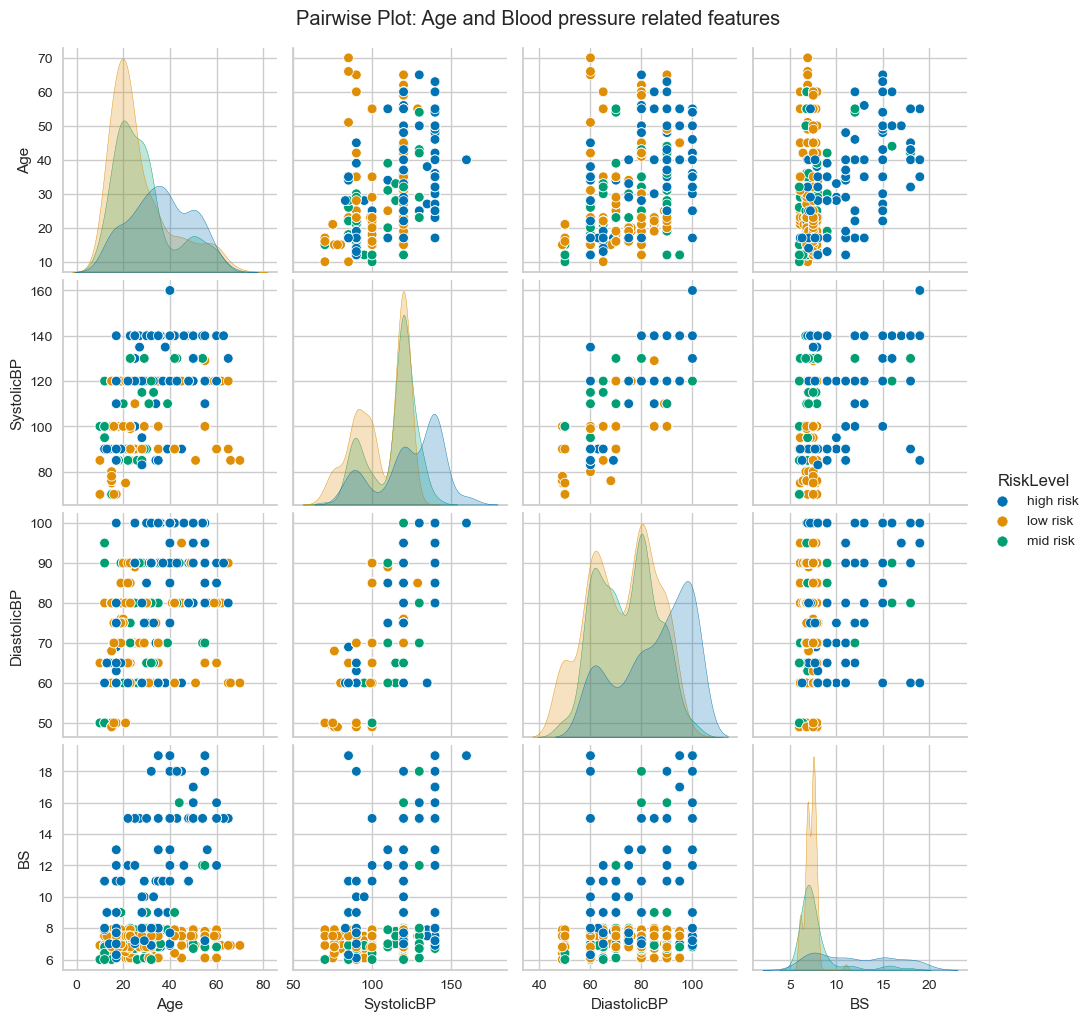

In [19]:
# Define feature sets
features_1 = ['Age', 'SystolicBP', 'DiastolicBP', 'BS']#'MAP']

# Pairwise plot 
plt.figure(figsize=(10, 5))
sns.pairplot(df, vars=features_1, hue='RiskLevel', palette='colorblind')
plt.suptitle('Pairwise Plot: Age and Blood pressure related features', y=1.02)
plt.show();


***Pair Plot Observation***
- There is a linear relationship between diastolicBP and systolicBP. This shows that as one increase, the other increases too.
- Age has no linear relationship with other features. Suggesting that risk in preganacy is not solely dependent on age but likely influenced by other factors
- The higher the Blood sugar, the more likelihood of a high risk pregnancy

## 4. Feature Engineering
The below feature engineering will be performed. N/B we will still retain our original data as our model building will utilize the original data and transformed data.
- create a new feature called MAP using the systolic and Diastolic BP feature
- Use Box-Cox transofrmation on Age and BS features that are positively skewed to achieve a more Guassian-like distribution.This ensures that our model performance is not adversely influenced by the presence of extreme values causing the positive skewness. Note that we will not transform the BodyTemp features as the data points range is narrow. 

In [20]:
# Make a copy of our original data as we need it for experimenting.
df_or = df.copy()

In [21]:
# Calculate Mean Arterial Pressure (MAP)
df['MAP'] = df['DiastolicBP'] + (1/3) * (df['SystolicBP'] - df['DiastolicBP'])

In [22]:
# Box-Cox transformation 
df['Age_Tr'], _ = boxcox(df['Age'] + 1)  # Adding 1 to handle zero values
df['BS_Tr'], _ = boxcox(df['BS'])

print(df)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.0      98.0         86  high risk   
1      35         140           90  13.0      98.0         70  high risk   
2      29          90           70   8.0     100.0         80  high risk   
3      30         140           85   7.0      98.0         70  high risk   
4      35         120           60   6.1      98.0         76   low risk   
...   ...         ...          ...   ...       ...        ...        ...   
1009   22         120           60  15.0      98.0         80  high risk   
1010   55         120           90  18.0      98.0         60  high risk   
1011   35          85           60  19.0      98.0         86  high risk   
1012   43         120           90  18.0      98.0         70  high risk   
1013   32         120           65   6.0     101.0         76   mid risk   

      RiskLevel_encode         MAP    Age_Tr     BS_Tr  
0                    2   96.66

In [23]:
# drop the original transformed features

df_transform = df.drop(['Age','BS'], axis=1)

## 5. Data Preprocessing
- It is essential to preprocess the data so as to ensure that the data is clean, well-formatted, and ready for model training.
This process when carefully done leads to more accurate and reliable results.

- **The following preprocessing will be applied:**
    - **identify and handle anomalies if any**
    - **Feature-target separation**
    - **Encode Categorical features where applicable**
    - **Scale and standardize features**
    - **Split data**
    

### 5.1. Identify and handle anomalies(where applicable)
- it has been established that our data does not contain any missing values. 

### 5.2. Feature-Target Separation
- **The target variable(Y) will be separated from the independent variables(X)**
- The target variable is the output our model will aim to predict.
- The independent variables will be the input our model will use to learn patterns and make predictions.

### 5.3. Encode Categorical features
It is essential for us to transform our categorical data to numerical for easy interpretabilty by our model as most model require numerical input. This ensures that the model can process the data effectively, leading to improved performance and accuracy.Following the mapping of our target variable, we will not perform any new encoding on my target variable

### 5.4. Split Data
- **Train and Test:** Our data will be split into training and testing sets, The training will be used training the model. The test set will be used to evaluate our model's performance on unseen data(test set).
- **Random state:** The random state will be set to a fixed interger. This ensures reproductivity meaning that for every time the code is ran, the split between the training and testing remains the same.
- **Stratification:** stratifying the target variable(y) ensures that the class distribution of the test and train will closely match that of the original data class distribution

### 5.5. Scale and Standardize the independent features(X)
it is important to scale/standardize our data before feeding it to a model as this helps to ensure that all features contribute equally to the model performance and prevents features with larger values to dominate the model learning process. 

## 5. Model building
We will utilize scikit-learn libraries and tensor flow in building our model. 
- **Scikit-learn** will be used in building the selected model
- **Tensor flow** we will use it to build a fastforward neural network model

We will implore 2 methods in buiding our model
- **Method 1** use the original data set
- **Method 2** use the transformed data set

For both methods, the process flow remains the same and that is

1) prepare our data for use in the model
2) train traditional models, select the best performer and hypertune
3) train FNN model
4) combine predictions of the best traditional model and fnn model and train a meta model on it.
5) Evaluate results obtained from (2), (3) and (4). 

Using this two methods, the best model or stage that ticks all evaluation metrics becomes our selected model



### 5.1. Method 1.Using original dataset


### 5.1.1. Train selected traditional models

In [24]:
# perform feature separation

X = df_or.drop(['RiskLevel','RiskLevel_encode'],axis=1)
y = df_or['RiskLevel_encode']

In [25]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [26]:
# instantiate our scaling method
scaler_or = StandardScaler()

# feed the independent variables(X) to our scaler
X_train_or = scaler_or.fit_transform(X_train)
X_test_or = scaler_or.transform(X_test)

In [27]:
# selection of our traditional model

models_or = [[RandomForestClassifier(random_state=42), 'Random Forest'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [ExtraTreesClassifier(random_state=42), 'ET Classifier'],
               [CatBoostClassifier(random_state=42), 'CB Classifier'],
         [lgb.LGBMClassifier(random_state=42),'LGB Classifier']]

In [28]:
# set up evaluation metrics
metrics_or = {'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC Score': []
}

In [29]:
# Run the training loop
for model, model_name in models_or:
    #fit the model
    model.fit(X_train_or, y_train)
   
    #evaluate the model
    pred_or = model.predict(X_test_or)
    
    acc_score_or = accuracy_score(y_test, pred_or)
    pre_score_or = precision_score(y_test, pred_or, average='macro')
    recal_score_or = recall_score(y_test, pred_or, average='macro')
    roc_score_or = roc_auc_score(y_test, model.predict_proba(X_test_or), multi_class='ovr')
    
    # Store metrics
    metrics_or['Model'].append(model_name)
    metrics_or['Accuracy'].append(f"{round(acc_score_or * 100, 2)}%")
    metrics_or['Precision'].append(f"{round(pre_score_or * 100, 2)}%")
    metrics_or['Recall'].append(f"{round(recal_score_or * 100, 2)}%")
    metrics_or['ROC AUC Score'].append(f"{round(roc_score_or * 100, 2)}%")
    
    if model_name != models_or[-1][1]:
        print(f"Evaluated {model_name}")

Evaluated Random Forest
Evaluated XGB Classifier
Evaluated ET Classifier
Learning rate set to 0.078286
0:	learn: 1.0504113	total: 170ms	remaining: 2m 50s
1:	learn: 1.0079825	total: 178ms	remaining: 1m 28s
2:	learn: 0.9758851	total: 181ms	remaining: 1m
3:	learn: 0.9446884	total: 186ms	remaining: 46.4s
4:	learn: 0.9175699	total: 191ms	remaining: 38s
5:	learn: 0.8932205	total: 193ms	remaining: 32s
6:	learn: 0.8729507	total: 196ms	remaining: 27.7s
7:	learn: 0.8521010	total: 198ms	remaining: 24.5s
8:	learn: 0.8327517	total: 200ms	remaining: 22s
9:	learn: 0.8132963	total: 202ms	remaining: 20s
10:	learn: 0.7992688	total: 203ms	remaining: 18.3s
11:	learn: 0.7836890	total: 205ms	remaining: 16.9s
12:	learn: 0.7716959	total: 207ms	remaining: 15.7s
13:	learn: 0.7600952	total: 208ms	remaining: 14.7s
14:	learn: 0.7489627	total: 210ms	remaining: 13.8s
15:	learn: 0.7367291	total: 211ms	remaining: 13s
16:	learn: 0.7266932	total: 213ms	remaining: 12.3s
17:	learn: 0.7188279	total: 214ms	remaining: 11.7s


217:	learn: 0.3427543	total: 534ms	remaining: 1.91s
218:	learn: 0.3418651	total: 536ms	remaining: 1.91s
219:	learn: 0.3411183	total: 537ms	remaining: 1.91s
220:	learn: 0.3403695	total: 539ms	remaining: 1.9s
221:	learn: 0.3399937	total: 540ms	remaining: 1.89s
222:	learn: 0.3390651	total: 542ms	remaining: 1.89s
223:	learn: 0.3386391	total: 543ms	remaining: 1.88s
224:	learn: 0.3382386	total: 544ms	remaining: 1.88s
225:	learn: 0.3376918	total: 546ms	remaining: 1.87s
226:	learn: 0.3373627	total: 547ms	remaining: 1.86s
227:	learn: 0.3369748	total: 549ms	remaining: 1.86s
228:	learn: 0.3359696	total: 551ms	remaining: 1.85s
229:	learn: 0.3353430	total: 553ms	remaining: 1.85s
230:	learn: 0.3348849	total: 554ms	remaining: 1.84s
231:	learn: 0.3342023	total: 556ms	remaining: 1.84s
232:	learn: 0.3337681	total: 559ms	remaining: 1.84s
233:	learn: 0.3333600	total: 561ms	remaining: 1.83s
234:	learn: 0.3328249	total: 562ms	remaining: 1.83s
235:	learn: 0.3323383	total: 565ms	remaining: 1.83s
236:	learn: 0

475:	learn: 0.2540164	total: 923ms	remaining: 1.01s
476:	learn: 0.2539160	total: 925ms	remaining: 1.01s
477:	learn: 0.2537311	total: 927ms	remaining: 1.01s
478:	learn: 0.2535479	total: 929ms	remaining: 1.01s
479:	learn: 0.2533203	total: 931ms	remaining: 1.01s
480:	learn: 0.2531105	total: 933ms	remaining: 1.01s
481:	learn: 0.2528174	total: 934ms	remaining: 1s
482:	learn: 0.2526276	total: 936ms	remaining: 1s
483:	learn: 0.2524550	total: 938ms	remaining: 999ms
484:	learn: 0.2521221	total: 939ms	remaining: 997ms
485:	learn: 0.2518885	total: 941ms	remaining: 995ms
486:	learn: 0.2517348	total: 943ms	remaining: 993ms
487:	learn: 0.2515527	total: 944ms	remaining: 991ms
488:	learn: 0.2514424	total: 946ms	remaining: 989ms
489:	learn: 0.2510435	total: 948ms	remaining: 986ms
490:	learn: 0.2508427	total: 950ms	remaining: 984ms
491:	learn: 0.2505384	total: 952ms	remaining: 983ms
492:	learn: 0.2503295	total: 955ms	remaining: 982ms
493:	learn: 0.2501834	total: 957ms	remaining: 980ms
494:	learn: 0.2500

710:	learn: 0.2189862	total: 1.32s	remaining: 536ms
711:	learn: 0.2188963	total: 1.32s	remaining: 534ms
712:	learn: 0.2187954	total: 1.32s	remaining: 532ms
713:	learn: 0.2187488	total: 1.32s	remaining: 530ms
714:	learn: 0.2186167	total: 1.32s	remaining: 528ms
715:	learn: 0.2185469	total: 1.32s	remaining: 526ms
716:	learn: 0.2184759	total: 1.33s	remaining: 524ms
717:	learn: 0.2183943	total: 1.33s	remaining: 522ms
718:	learn: 0.2182287	total: 1.33s	remaining: 520ms
719:	learn: 0.2181640	total: 1.33s	remaining: 518ms
720:	learn: 0.2180408	total: 1.33s	remaining: 516ms
721:	learn: 0.2179851	total: 1.33s	remaining: 514ms
722:	learn: 0.2178616	total: 1.34s	remaining: 512ms
723:	learn: 0.2176856	total: 1.34s	remaining: 510ms
724:	learn: 0.2175749	total: 1.34s	remaining: 508ms
725:	learn: 0.2175178	total: 1.34s	remaining: 506ms
726:	learn: 0.2174617	total: 1.34s	remaining: 505ms
727:	learn: 0.2174196	total: 1.35s	remaining: 503ms
728:	learn: 0.2173583	total: 1.35s	remaining: 501ms
729:	learn: 

921:	learn: 0.2031419	total: 1.7s	remaining: 144ms
922:	learn: 0.2030121	total: 1.7s	remaining: 142ms
923:	learn: 0.2029370	total: 1.7s	remaining: 140ms
924:	learn: 0.2028772	total: 1.7s	remaining: 138ms
925:	learn: 0.2028502	total: 1.71s	remaining: 136ms
926:	learn: 0.2028143	total: 1.71s	remaining: 134ms
927:	learn: 0.2027574	total: 1.71s	remaining: 133ms
928:	learn: 0.2026752	total: 1.71s	remaining: 131ms
929:	learn: 0.2026046	total: 1.71s	remaining: 129ms
930:	learn: 0.2025199	total: 1.71s	remaining: 127ms
931:	learn: 0.2024236	total: 1.71s	remaining: 125ms
932:	learn: 0.2023759	total: 1.72s	remaining: 123ms
933:	learn: 0.2023212	total: 1.72s	remaining: 121ms
934:	learn: 0.2022760	total: 1.72s	remaining: 120ms
935:	learn: 0.2022244	total: 1.72s	remaining: 118ms
936:	learn: 0.2021716	total: 1.72s	remaining: 116ms
937:	learn: 0.2021482	total: 1.72s	remaining: 114ms
938:	learn: 0.2020526	total: 1.73s	remaining: 112ms
939:	learn: 0.2019924	total: 1.73s	remaining: 110ms
940:	learn: 0.20

In [30]:
# Create DataFrame from metrics dictionary
metrics_or_df = pd.DataFrame(metrics_or)

metrics_or_df

,Model,Accuracy,Precision,Recall,ROC AUC Score
0,Random Forest,87.19%,87.45%,87.34%,96.59%
1,XGB Classifier,86.21%,86.33%,86.26%,96.7%
2,ET Classifier,85.71%,85.66%,86.02%,96.07%
3,CB Classifier,86.7%,86.89%,86.82%,96.41%
4,LGB Classifier,86.7%,86.54%,86.84%,96.16%


***Observation from traditional model building using original data***
- Random Forest classifier emerged as the best performed model. 

In [31]:
# Define the hyperparameter space
param_rf = {
   'n_estimators': Integer(10, 200),                # Number of trees in the forest
    'max_depth': Integer(1, 50),                     # Maximum depth of the trees
    'min_samples_split': Integer(2, 20),              # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 20),               # Minimum number of samples required to be at a leaf node
    'max_features': Real(0.1, 1.0, prior='uniform')  # Number of features to consider when looking for the best split
}

In [32]:
# Create the BayesSearchCV object
bayes_rf=BayesSearchCV(
    estimator=RandomForestClassifier(),
    search_spaces=param_rf,
    n_iter=100,  # Number of iterations
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),       # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42
)

In [33]:
# Fit the optimizer
rf_fit =bayes_rf.fit(X_train_or, y_train)

In [34]:
# Get the best parameters and best score
best_params_rf = rf_fit.best_params_
best_score_rf = rf_fit.best_score_

print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {best_score_rf:.4f}")

Best Parameters: OrderedDict([('max_depth', 41), ('max_features', 0.901649560548375), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 193)])
Best Cross-Validation Accuracy: 0.8312


In [35]:
# Train the final model with the best parameters
model_rf_or = RandomForestClassifier(**best_params_rf, random_state=42)
model_rf_or.fit(X_train_or, y_train)

RandomForestClassifier(max_depth=41, max_features=0.901649560548375,
                       n_estimators=193, random_state=42)

In [36]:
#Predict on the train set
rf_train_pred = model_rf_or.predict(X_train_or)

#get training prediction probabilities
rf_train_prob = model_rf_or.predict_proba(X_train_or)

# Predict on the test set
rf_test_pred = model_rf_or.predict(X_test_or)

#get prediction probabilities
rf_test_prob = model_rf_or.predict_proba(X_test_or)



In [37]:
#Evaluate the model performance
rf_classification_rep = classification_report(y_test, rf_test_pred)

print("Classification Report:Random Forest Classifier on Original Data")
print(rf_classification_rep)

Classification Report:Random Forest Classifier on Original Data
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        81
           1       0.86      0.93      0.89        67
           2       0.91      0.87      0.89        55

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.89      0.89       203



### 5.1.2. Build FNN model

In [38]:
# Set the random seed for reproducibility
random_seed = 42
#np.random.seed(random_seed)
tf.random.set_seed(random_seed)

def build_fnn(input_shape):
    model = tf.keras.models.Sequential()
    
    # Input layer and first hidden layer
    model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.0001)))
    model.add(tf.keras.layers.Dropout(0.2))  
    
    # Second hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(tf.keras.layers.Dropout(0.2))  
    
    # Third hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(tf.keras.layers.Dropout(0.2))  
    
    # Output layer for multiclass classification
    model.add(tf.keras.layers.Dense(3, activation='softmax')) 

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model


In [39]:
# Train on the fnn model
'''fnn_model_or = build_fnn(X_train_or.shape[1])
history_or = fnn_model_or.fit(X_train_or, y_train, epochs=400, batch_size=32, 
                              validation_data =(X_test_or,y_test), verbose=2)'''

'fnn_model_or = build_fnn(X_train_or.shape[1])\nhistory_or = fnn_model_or.fit(X_train_or, y_train, epochs=400, batch_size=32, \n                              validation_data =(X_test_or,y_test), verbose=2)'

In [40]:
# Plot training & validation accuracy values
'''plt.figure(figsize=(10, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_or.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', markersize=2)
plt.plot(history_or.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', markersize=2)
plt.title('Training and Validation Accuracy on Original Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_or.history['loss'], label='Training Loss', marker='o', linestyle='-', markersize=2)
plt.plot(history_or.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', markersize=2)
plt.title('Training and Validation Loss on Original Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()'''

"plt.figure(figsize=(10, 5))\n\n# Plot Accuracy\nplt.subplot(1, 2, 1)\nplt.plot(history_or.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', markersize=2)\nplt.plot(history_or.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', markersize=2)\nplt.title('Training and Validation Accuracy on Original Data')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid(True)\n\n# Plot Loss\nplt.subplot(1, 2, 2)\nplt.plot(history_or.history['loss'], label='Training Loss', marker='o', linestyle='-', markersize=2)\nplt.plot(history_or.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', markersize=2)\nplt.title('Training and Validation Loss on Original Data')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.grid(True)\n\nplt.tight_layout()\nplt.show()"

In [41]:
# Save the trained model
#fnn_model_or = fnn_model_or.save('fnn_model_or.keras')

In [42]:
# Load the saved model
fnn_model_or = load_model('fnn_model_or.keras')

In [43]:
#Get training predictions probabilities
fnn_train_pred_or = fnn_model_or.predict(X_train_or)

#convert training predictions to classes
fnn_train_prob_or = np.argmax(fnn_train_pred_or, axis=1)

# Get test predictions probabilities
fnn_test_pred_or = fnn_model_or.predict(X_test_or) 

# convert prediction to classes
fnn_test_prob_or = np.argmax(fnn_test_pred_or, axis=1) 


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [44]:
#Evaluate the model performance
fnn_classification_rep_or = classification_report(y_test, fnn_test_prob_or)

print("Classification Report:FNN model on the Original Data")
print(fnn_classification_rep_or)

Classification Report:FNN model on the Original Data
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        81
           1       0.69      0.46      0.55        67
           2       0.82      0.82      0.82        55

    accuracy                           0.72       203
   macro avg       0.73      0.72      0.71       203
weighted avg       0.72      0.72      0.71       203



### 5.1.3. Ensemble predictions of the RF and FNN model and Evaluate 

In [45]:
# Make a dataframe of FNN predictions
fnn_predictions_or = pd.DataFrame(fnn_test_pred_or, columns=['Score_0', 'Score_1', 'Score_2'])
fnn_predictions_or['Label'] = fnn_predictions_or.idxmax(axis=1).str.replace('Score_', '').astype(int)

In [46]:
# Make a dataframe of RF predictions
rf_pred_df = pd.DataFrame(rf_test_pred, columns=['Label'])

# Make a dataframe of probabilities
rf_prob_df = pd.DataFrame(rf_test_prob, columns=['Score_0', 'Score_1', 'Score_2'])

# Concatenate the predictions and probabilities DataFrames
rf_predictions_or = pd.concat([rf_pred_df, rf_prob_df], axis=1)

In [47]:
#Ensure both predictions DataFrames have the same index
rf_predictions_or = rf_predictions_or.reset_index(drop=True)
fnn_predictions_or = fnn_predictions_or.reset_index(drop=True)

In [48]:
# Extract necessary columns for probabilities
rf_probs = rf_predictions_or[['Score_0', 'Score_1', 'Score_2']]
fnn_probs = fnn_predictions_or[['Score_0', 'Score_1', 'Score_2']]

In [49]:
# Average the probabilities from both models
ensemble_probs = (rf_probs.values + fnn_probs.values) / 2

# Check that the combined probabilities sum to 1
assert np.allclose(ensemble_probs.sum(axis=1), 1), "Probabilities should sum to 1 for each sample"

# Determine the final predicted class based on the maximum combined probability
ensemble_pred = np.argmax(ensemble_probs, axis=1)

In [50]:
# Evaluate the model on our unseen data(y_test)
ensemble_classification_rep = classification_report(y_test, ensemble_pred)


print("Classification Report:Ensemble predictions of FNN and RF using soft voting")
print(ensemble_classification_rep)

Classification Report:Ensemble predictions of FNN and RF using soft voting
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        81
           1       0.80      0.85      0.83        67
           2       0.92      0.85      0.89        55

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



### 5.1.4. Ensemble predictions of train and test data and use it as features and train a meta model

In [51]:
# Combine the predictions from base models for training data
X_train_meta_or = np.column_stack([rf_train_prob, fnn_train_pred_or])
y_train_meta_or = y_train  # Target labels for the meta-model

# Combine predictions from base models for test data
X_test_meta_or = np.column_stack([rf_test_prob, fnn_test_pred_or])

In [52]:
# selection of our meta model

models_meta_or = [[LogisticRegression(random_state=42), 'Logistic Regression'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [ExtraTreesClassifier(random_state=42), 'ET Classifier'],
               [SVC(probability=True,random_state=42), 'SVC'],
         [DecisionTreeClassifier(random_state=42),'Decision Tree Classifier']]

In [53]:
# set up evaluation metrics
metrics_meta_or = {'Model_meta': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC Score': []
}

In [54]:
# Run the training loop
for model_meta, model_name_meta in models_meta_or:
    #fit the model
    model_meta.fit(X_train_meta_or, y_train_meta_or)
   
    #evaluate the model
    pred_meta_or = model_meta.predict(X_test_meta_or)
    
    acc_score_meta_or = accuracy_score(y_test, pred_meta_or)
    pre_score_meta_or = precision_score(y_test, pred_meta_or, average='macro')
    recal_score_meta_or = recall_score(y_test, pred_meta_or, average='macro')
    roc_score_meta_or = roc_auc_score(y_test, model_meta.predict_proba(X_test_meta_or), multi_class='ovr')
    
    # Store metrics
    metrics_meta_or['Model_meta'].append(model_name_meta)
    metrics_meta_or['Accuracy'].append(f"{round(acc_score_meta_or * 100, 2)}%")
    metrics_meta_or['Precision'].append(f"{round(pre_score_meta_or * 100, 2)}%")
    metrics_meta_or['Recall'].append(f"{round(recal_score_meta_or * 100, 2)}%")
    metrics_meta_or['ROC AUC Score'].append(f"{round(roc_score_meta_or * 100, 2)}%")
    
    if model_name_meta != models_meta_or[-1][1]:
        print(f"Evaluated {model_name_meta}")

Evaluated Logistic Regression
Evaluated XGB Classifier
Evaluated ET Classifier
Evaluated SVC


In [55]:
# Create DataFrame from metrics dictionary
metrics_meta_or_df = pd.DataFrame(metrics_meta_or)

metrics_meta_or_df

,Model_meta,Accuracy,Precision,Recall,ROC AUC Score
0,Logistic Regression,88.18%,88.38%,88.07%,97.1%
1,XGB Classifier,86.21%,86.43%,86.17%,97.01%
2,ET Classifier,88.18%,88.38%,88.07%,96.49%
3,SVC,86.21%,86.4%,86.6%,94.14%
4,Decision Tree Classifier,88.18%,88.38%,88.07%,95.91%


In [56]:
# Define the hyperparameter space for the logistic regression meta-model
param_lr = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'solver': Categorical(['lbfgs', 'liblinear'])
}

In [57]:
'''param_et = {
    'n_estimators': Integer(50, 200),                # Number of trees in the forest
    'max_depth': Integer(1, 30),                     # Maximum depth of the trees
    'min_samples_split': Integer(2, 20),             # Minimum samples required to split an internal node
    'min_samples_leaf': Integer(1, 20),              # Minimum samples required to be at a leaf node
    'max_features': Real(0.1, 1.0, prior='uniform'), # Number of features to consider at each split
    'bootstrap': Categorical([True, False])          # Whether bootstrap samples are used
}'''

"param_et = {\n    'n_estimators': Integer(50, 200),                # Number of trees in the forest\n    'max_depth': Integer(1, 30),                     # Maximum depth of the trees\n    'min_samples_split': Integer(2, 20),             # Minimum samples required to split an internal node\n    'min_samples_leaf': Integer(1, 20),              # Minimum samples required to be at a leaf node\n    'max_features': Real(0.1, 1.0, prior='uniform'), # Number of features to consider at each split\n    'bootstrap': Categorical([True, False])          # Whether bootstrap samples are used\n}"

In [58]:
# Set up the BayesSearchCV
bayes_lr = BayesSearchCV(
    estimator=LogisticRegression(),
    search_spaces=param_lr,
    n_iter=100,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

In [59]:
# Fit the model
best_lr_or = bayes_lr.fit(X_train_meta_or, y_train_meta_or)

In [60]:
# Get the best parameters and best score
best_params_lr = best_lr_or.best_params_
best_score_lr = best_lr_or.best_score_

print(f"Best Parameters: {best_params_lr}")
print(f"Best Cross-Validation Accuracy: {best_score_lr:.4f}")

Best Parameters: OrderedDict([('C', 0.5407482748527389), ('solver', 'lbfgs')])
Best Cross-Validation Accuracy: 0.9224


In [61]:
#Re-initialise the model using the best parametr found
final_model_lr = LogisticRegression(**best_params_lr, random_state=42)
final_model_lr.fit(X_train_meta_or, y_train_meta_or)

LogisticRegression(C=0.5407482748527389, random_state=42)

In [62]:
# Predict on the test set
y_pred_lr_or = final_model_lr.predict(X_test_meta_or)


In [63]:
# Evaluate on the unseen data
meta_classification_rep = classification_report(y_test, y_pred_lr_or)


print("Classification Report:Meta Model(Logistic regression) on stacked predictions of FNN and RF on the Original data")
print(meta_classification_rep)

Classification Report:Meta Model(Logistic regression) on stacked predictions of FNN and RF on the Original data
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        81
           1       0.87      0.88      0.87        67
           2       0.90      0.85      0.88        55

    accuracy                           0.88       203
   macro avg       0.88      0.87      0.88       203
weighted avg       0.88      0.88      0.88       203



### 5.2. Method 2. Using transformed data set

### 5.2.1. Train selected traditional models on the transformed data

In [64]:
# perform feature separation

X_tr = df_transform.drop(['RiskLevel','RiskLevel_encode','BodyTemp'],axis=1)
y_tr = df_transform['RiskLevel_encode']

In [65]:
# Split the transformed data 
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X_tr, y_tr, test_size=0.20, random_state=123, stratify=y_tr)

In [66]:
# instantiate our scaling method
scaler_tr = StandardScaler()

# feed the independent variables(X) to our scaler
X_train_tr_sca = scaler_tr.fit_transform(X_train_tr)
X_test_tr_sca = scaler_tr.transform(X_test_tr)

In [67]:
# selection of our traditional model

model_tr = [[RandomForestClassifier(random_state=42), 'Random Forest'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [ExtraTreesClassifier(random_state=42), 'ET Classifier'],
               [CatBoostClassifier(random_state=42), 'CB Classifier'],
         [lgb.LGBMClassifier(random_state=42),'LGB Classifier']]

In [68]:
metrics_tr = {'Model_tr': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC Score': []
}

In [69]:
# Run the training loop
for models_tr, model_name_tr in model_tr:
    #fit the model
    models_tr.fit(X_train_tr_sca, y_train_tr)
   
    #evaluate the model
    pred_tr = models_tr.predict(X_test_tr_sca)
    
    acc_score_tr = accuracy_score(y_test_tr, pred_tr)
    pre_score_tr = precision_score(y_test_tr, pred_tr, average='macro')
    recal_score_tr = recall_score(y_test_tr, pred_tr, average='macro')
    roc_score_tr = roc_auc_score(y_test_tr, models_tr.predict_proba(X_test_tr_sca), multi_class='ovr')
    
    # Store metrics
    metrics_tr['Model_tr'].append(model_name_tr)
    metrics_tr['Accuracy'].append(f"{round(acc_score_tr * 100, 2)}%")
    metrics_tr['Precision'].append(f"{round(pre_score_tr * 100, 2)}%")
    metrics_tr['Recall'].append(f"{round(recal_score_tr * 100, 2)}%")
    metrics_tr['ROC AUC Score'].append(f"{round(roc_score_tr * 100, 2)}%")
    
    if model_name_tr != model_tr[-1][1]:
        print(f"Evaluated {model_name_tr}")

Evaluated Random Forest
Evaluated XGB Classifier
Evaluated ET Classifier
Learning rate set to 0.078286
0:	learn: 1.0540592	total: 2.07ms	remaining: 2.07s
1:	learn: 1.0167525	total: 4.35ms	remaining: 2.17s
2:	learn: 0.9841566	total: 6.83ms	remaining: 2.27s
3:	learn: 0.9553527	total: 9.31ms	remaining: 2.32s
4:	learn: 0.9259966	total: 15.5ms	remaining: 3.09s
5:	learn: 0.9036507	total: 21.5ms	remaining: 3.56s
6:	learn: 0.8835938	total: 23.7ms	remaining: 3.36s
7:	learn: 0.8657794	total: 26.5ms	remaining: 3.29s
8:	learn: 0.8476961	total: 28.3ms	remaining: 3.11s
9:	learn: 0.8292015	total: 30.2ms	remaining: 2.99s
10:	learn: 0.8156747	total: 31.8ms	remaining: 2.86s
11:	learn: 0.7990233	total: 33.3ms	remaining: 2.74s
12:	learn: 0.7869975	total: 34.7ms	remaining: 2.64s
13:	learn: 0.7764624	total: 36.3ms	remaining: 2.56s
14:	learn: 0.7654193	total: 37.9ms	remaining: 2.49s
15:	learn: 0.7538422	total: 39.7ms	remaining: 2.44s
16:	learn: 0.7435957	total: 41.8ms	remaining: 2.42s
17:	learn: 0.7360627	to

217:	learn: 0.3604534	total: 355ms	remaining: 1.27s
218:	learn: 0.3597281	total: 357ms	remaining: 1.27s
219:	learn: 0.3590519	total: 359ms	remaining: 1.27s
220:	learn: 0.3586009	total: 361ms	remaining: 1.27s
221:	learn: 0.3581278	total: 362ms	remaining: 1.27s
222:	learn: 0.3577261	total: 364ms	remaining: 1.27s
223:	learn: 0.3565703	total: 365ms	remaining: 1.26s
224:	learn: 0.3558218	total: 367ms	remaining: 1.26s
225:	learn: 0.3553767	total: 369ms	remaining: 1.26s
226:	learn: 0.3551030	total: 370ms	remaining: 1.26s
227:	learn: 0.3545865	total: 372ms	remaining: 1.26s
228:	learn: 0.3538211	total: 374ms	remaining: 1.26s
229:	learn: 0.3528308	total: 375ms	remaining: 1.26s
230:	learn: 0.3523429	total: 377ms	remaining: 1.25s
231:	learn: 0.3518324	total: 378ms	remaining: 1.25s
232:	learn: 0.3514561	total: 380ms	remaining: 1.25s
233:	learn: 0.3506588	total: 382ms	remaining: 1.25s
234:	learn: 0.3501980	total: 383ms	remaining: 1.25s
235:	learn: 0.3497789	total: 385ms	remaining: 1.25s
236:	learn: 

377:	learn: 0.2880284	total: 693ms	remaining: 1.14s
378:	learn: 0.2878004	total: 695ms	remaining: 1.14s
379:	learn: 0.2875608	total: 697ms	remaining: 1.14s
380:	learn: 0.2870229	total: 699ms	remaining: 1.13s
381:	learn: 0.2868455	total: 700ms	remaining: 1.13s
382:	learn: 0.2864996	total: 702ms	remaining: 1.13s
383:	learn: 0.2863216	total: 705ms	remaining: 1.13s
384:	learn: 0.2859467	total: 707ms	remaining: 1.13s
385:	learn: 0.2857079	total: 709ms	remaining: 1.13s
386:	learn: 0.2853663	total: 710ms	remaining: 1.13s
387:	learn: 0.2849054	total: 712ms	remaining: 1.12s
388:	learn: 0.2847412	total: 714ms	remaining: 1.12s
389:	learn: 0.2844725	total: 716ms	remaining: 1.12s
390:	learn: 0.2842065	total: 717ms	remaining: 1.12s
391:	learn: 0.2839157	total: 720ms	remaining: 1.12s
392:	learn: 0.2835664	total: 722ms	remaining: 1.11s
393:	learn: 0.2833818	total: 723ms	remaining: 1.11s
394:	learn: 0.2831291	total: 725ms	remaining: 1.11s
395:	learn: 0.2830341	total: 727ms	remaining: 1.11s
396:	learn: 

615:	learn: 0.2372550	total: 1.07s	remaining: 670ms
616:	learn: 0.2371005	total: 1.08s	remaining: 668ms
617:	learn: 0.2370165	total: 1.08s	remaining: 666ms
618:	learn: 0.2369470	total: 1.08s	remaining: 664ms
619:	learn: 0.2367670	total: 1.08s	remaining: 663ms
620:	learn: 0.2365132	total: 1.08s	remaining: 661ms
621:	learn: 0.2363765	total: 1.08s	remaining: 659ms
622:	learn: 0.2361951	total: 1.09s	remaining: 657ms
623:	learn: 0.2360753	total: 1.09s	remaining: 655ms
624:	learn: 0.2358315	total: 1.09s	remaining: 654ms
625:	learn: 0.2357246	total: 1.09s	remaining: 652ms
626:	learn: 0.2356104	total: 1.09s	remaining: 650ms
627:	learn: 0.2354772	total: 1.09s	remaining: 648ms
628:	learn: 0.2353737	total: 1.09s	remaining: 646ms
629:	learn: 0.2351524	total: 1.1s	remaining: 644ms
630:	learn: 0.2349933	total: 1.1s	remaining: 643ms
631:	learn: 0.2348463	total: 1.1s	remaining: 641ms
632:	learn: 0.2346852	total: 1.1s	remaining: 640ms
633:	learn: 0.2345367	total: 1.1s	remaining: 638ms
634:	learn: 0.234

848:	learn: 0.2126867	total: 1.45s	remaining: 257ms
849:	learn: 0.2125879	total: 1.45s	remaining: 256ms
850:	learn: 0.2124851	total: 1.45s	remaining: 254ms
851:	learn: 0.2124170	total: 1.45s	remaining: 252ms
852:	learn: 0.2122985	total: 1.45s	remaining: 250ms
853:	learn: 0.2122364	total: 1.46s	remaining: 249ms
854:	learn: 0.2121479	total: 1.46s	remaining: 247ms
855:	learn: 0.2121105	total: 1.46s	remaining: 246ms
856:	learn: 0.2120092	total: 1.46s	remaining: 244ms
857:	learn: 0.2119312	total: 1.46s	remaining: 242ms
858:	learn: 0.2118202	total: 1.47s	remaining: 241ms
859:	learn: 0.2117703	total: 1.47s	remaining: 239ms
860:	learn: 0.2117229	total: 1.47s	remaining: 237ms
861:	learn: 0.2115915	total: 1.47s	remaining: 235ms
862:	learn: 0.2115254	total: 1.47s	remaining: 234ms
863:	learn: 0.2114887	total: 1.48s	remaining: 233ms
864:	learn: 0.2113854	total: 1.48s	remaining: 231ms
865:	learn: 0.2113021	total: 1.48s	remaining: 229ms
866:	learn: 0.2111934	total: 1.48s	remaining: 228ms
867:	learn: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [70]:
# Create DataFrame from metrics dictionary
metrics_df_tr = pd.DataFrame(metrics_tr)

metrics_df_tr

,Model_tr,Accuracy,Precision,Recall,ROC AUC Score
0,Random Forest,90.64%,90.6%,90.78%,96.39%
1,XGB Classifier,87.68%,87.73%,88.05%,96.86%
2,ET Classifier,88.18%,88.22%,88.46%,96.01%
3,CB Classifier,87.19%,87.34%,87.23%,96.32%
4,LGB Classifier,87.19%,87.19%,87.47%,96.46%


In [71]:
# using optimization to fit our random forest

rf_fit_tr = bayes_rf.fit(X_train_tr_sca, y_train_tr)

In [72]:
# Get the best parameters and best score
best_params_rf_tr = rf_fit_tr.best_params_
best_score_rf_tr = rf_fit_tr.best_score_

print(f"Best Parameters: {best_params_rf_tr}")
print(f"Best Cross-Validation Accuracy: {best_score_rf_tr:.4f}")

Best Parameters: OrderedDict([('max_depth', 47), ('max_features', 0.3445663173854887), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 47)])
Best Cross-Validation Accuracy: 0.8237


In [73]:
# Train the final model with the best parameters
model_rf_tr = RandomForestClassifier(**best_params_rf, random_state=42)
model_rf_tr.fit(X_train_tr_sca, y_train_tr)

RandomForestClassifier(max_depth=41, max_features=0.901649560548375,
                       n_estimators=193, random_state=42)

In [74]:
#Predict on the train set
rf_train_pred_tr = model_rf_tr.predict(X_train_tr_sca)

#get training prediction probabilities
rf_train_prob_tr = model_rf_tr.predict_proba(X_train_tr_sca)

# Predict on the test set
rf_test_pred_tr = model_rf_tr.predict(X_test_tr_sca)

#get prediction probabilities
rf_test_prob_tr = model_rf_tr.predict_proba(X_test_tr_sca)

In [75]:
#Evaluate the model performance
rf_classification_rep_tr = classification_report(y_test_tr, rf_test_pred_tr)

print("Classification Report:")
print(rf_classification_rep_tr)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        81
           1       0.87      0.90      0.88        67
           2       0.91      0.87      0.89        55

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.89      0.89       203



***Observation*** Our default random forest on transformed data performed better than the tuned model, so we will use the default model

In [76]:
# extracting our default random forest from the model list.
rf_default = next(model for model, name in model_tr if name == 'Random Forest')

# Fit the default CatBoostClassifier
rf_default.fit(X_train_tr_sca, y_train_tr)

RandomForestClassifier(random_state=42)

In [77]:
#Predict on the train set
rf_train_pred_de = rf_default.predict(X_train_tr_sca)

#get training prediction probabilities
rf_train_prob_de = rf_default.predict_proba(X_train_tr_sca)

# Predict on the test set
rf_test_pred_de = rf_default.predict(X_test_tr_sca)

#get prediction probabilities
rf_test_prob_de = rf_default.predict_proba(X_test_tr_sca)


In [78]:
#Evaluate the model performance
rf_classification_rep_de = classification_report(y_test_tr, rf_test_pred_de)

print("Classification Report:")
print(rf_classification_rep_de)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        81
           1       0.89      0.93      0.91        67
           2       0.91      0.91      0.91        55

    accuracy                           0.91       203
   macro avg       0.91      0.91      0.91       203
weighted avg       0.91      0.91      0.91       203



### 5.2.2. Train FNN on theh transformed data

In [79]:
# we will use the existing FNN model building to train
# Train on the fnn model
'''fnn_model_tr = build_fnn(X_train_tr_sca.shape[1])
history_tr = fnn_model_tr.fit(X_train_tr_sca, y_train_tr, epochs=400, batch_size=32, 
                              validation_data =(X_test_tr_sca,y_test_tr), verbose=2)'''

'fnn_model_tr = build_fnn(X_train_tr_sca.shape[1])\nhistory_tr = fnn_model_tr.fit(X_train_tr_sca, y_train_tr, epochs=400, batch_size=32, \n                              validation_data =(X_test_tr_sca,y_test_tr), verbose=2)'

In [80]:
# Plot training & validation accuracy values
'''plt.figure(figsize=(10, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_tr.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', markersize=2)
plt.plot(history_tr.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', markersize=2)
plt.title('Training and Validation Accuracy on transformed data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_tr.history['loss'], label='Training Loss', marker='o', linestyle='-', markersize=2)
plt.plot(history_tr.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', markersize=2)
plt.title('Training and Validation Loss on tranformed data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()'''

"plt.figure(figsize=(10, 5))\n\n# Plot Accuracy\nplt.subplot(1, 2, 1)\nplt.plot(history_tr.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', markersize=2)\nplt.plot(history_tr.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', markersize=2)\nplt.title('Training and Validation Accuracy on transformed data')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid(True)\n\n# Plot Loss\nplt.subplot(1, 2, 2)\nplt.plot(history_tr.history['loss'], label='Training Loss', marker='o', linestyle='-', markersize=2)\nplt.plot(history_tr.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', markersize=2)\nplt.title('Training and Validation Loss on tranformed data')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.grid(True)\n\nplt.tight_layout()\nplt.show()"

In [81]:
# Save the trained model
#fnn_model_tr.save('fnn_model_tr.keras')

In [82]:
# Load the saved model
fnn_model_tr = load_model('fnn_model_tr.keras')

In [83]:
#Get training predictions probabilities
fnn_train_pred_tr = fnn_model_tr.predict(X_train_tr_sca)

#convert training predictions to classes
fnn_train_prob_tr = np.argmax(fnn_train_pred_tr, axis=1)

# Get test predictions probabilities
fnn_test_pred_tr = fnn_model_tr.predict(X_test_tr_sca) 

# convert prediction to classes
fnn_test_prob_tr = np.argmax(fnn_test_pred_tr, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [84]:
#Evaluate the model performance
fnn_classification_rep_tr = classification_report(y_test_tr, fnn_test_prob_tr)

print("Classification Report:")
print(fnn_classification_rep_tr)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        81
           1       0.73      0.52      0.61        67
           2       0.81      0.80      0.81        55

    accuracy                           0.74       203
   macro avg       0.75      0.74      0.74       203
weighted avg       0.75      0.74      0.74       203



### 5.2.3. Ensemble predictions of the RF and FNN model trained on the transformed data and Evaluate

In [85]:
# Make a dataframe of FNN predictions
fnn_predictions_tr = pd.DataFrame(fnn_test_pred_tr, columns=['Score_0', 'Score_1', 'Score_2'])
fnn_predictions_tr['Label'] = fnn_predictions_tr.idxmax(axis=1).str.replace('Score_', '').astype(int)

In [86]:
# Make a dataframe of RF predictions
rf_pred_df_tr = pd.DataFrame(rf_test_pred_de, columns=['Label'])

# Make a dataframe of probabilities
rf_prob_df_tr = pd.DataFrame(rf_test_prob_de, columns=['Score_0', 'Score_1', 'Score_2'])

# Concatenate the predictions and probabilities DataFrames
rf_predictions_tr = pd.concat([rf_pred_df_tr, rf_prob_df_tr], axis=1)

In [87]:
#Ensure both predictions DataFrames have the same index
rf_predictions_tr = rf_predictions_tr.reset_index(drop=True)
fnn_predictions_tr = fnn_predictions_tr.reset_index(drop=True)

In [88]:
# Extract necessary columns for probabilities
rf_probs_tr = rf_predictions_tr[['Score_0', 'Score_1', 'Score_2']]
fnn_probs_tr = fnn_predictions_tr[['Score_0', 'Score_1', 'Score_2']]

In [89]:
# Average the probabilities from both models
ensemble_probs_tr = (rf_probs_tr.values + fnn_probs_tr.values) / 2

# Check that the combined probabilities sum to 1
assert np.allclose(ensemble_probs_tr.sum(axis=1), 1), "Probabilities should sum to 1 for each sample"

# Determine the final predicted class based on the maximum combined probability
ensemble_pred_tr = np.argmax(ensemble_probs_tr, axis=1)

In [90]:
# Evaluate the model on our unseen data(y_test)
ensemble_classification_rep_tr = classification_report(y_test_tr, ensemble_pred_tr)


print("Classification Report:")
print(ensemble_classification_rep_tr)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        81
           1       0.82      0.82      0.82        67
           2       0.90      0.80      0.85        55

    accuracy                           0.85       203
   macro avg       0.85      0.84      0.85       203
weighted avg       0.85      0.85      0.85       203



### 5.2.4. Ensemble predictions of train and test data on the transformed data and use it as features and train a meta model

In [91]:
# Combine the predictions from base models for training data
X_train_meta_tr = np.column_stack([rf_train_prob_de, fnn_train_pred_tr])
y_train_meta_tr = y_train_tr  # Target labels for the meta-model

# Combine predictions from base models for test data
X_test_meta_tr = np.column_stack([rf_test_prob_de, fnn_test_pred_tr])

In [92]:
# selection of our meta model

model_meta_tr = [[LogisticRegression(random_state=42), 'Logistic Regression'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [ExtraTreesClassifier(random_state=42), 'ET Classifier'],
               [SVC(probability=True,random_state=42), 'SVC'],
         [DecisionTreeClassifier(random_state=42),'Decision Tree Classifier']]

In [93]:
metrics_meta_tr = {'Model_meta_tr': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC Score': []
}

In [94]:
# Run the training loop
for models_meta_tr, model_name_meta_tr in model_meta_tr:
    #fit the model
    models_meta_tr.fit(X_train_meta_tr, y_train_meta_tr)
   
    #evaluate the model
    pred_meta_tr = models_meta_tr.predict(X_test_meta_tr)
    
    acc_score_meta_tr = accuracy_score(y_test_tr, pred_meta_tr)
    pre_score_meta_tr = precision_score(y_test_tr, pred_meta_tr, average='macro')
    recal_score_meta_tr = recall_score(y_test_tr, pred_meta_tr, average='macro')
    roc_score_meta_tr = roc_auc_score(y_test_tr, models_meta_tr.predict_proba(X_test_meta_tr), multi_class='ovr')
    
    # Store metrics
    metrics_meta_tr['Model_meta_tr'].append(model_name_meta_tr)
    metrics_meta_tr['Accuracy'].append(f"{round(acc_score_meta_tr * 100, 2)}%")
    metrics_meta_tr['Precision'].append(f"{round(pre_score_meta_tr * 100, 2)}%")
    metrics_meta_tr['Recall'].append(f"{round(recal_score_meta_tr * 100, 2)}%")
    metrics_meta_tr['ROC AUC Score'].append(f"{round(roc_score_meta_tr * 100, 2)}%")
    
    if model_name_meta_tr != model_meta_tr[-1][1]:
        print(f"Evaluated {model_name_meta_tr}")

Evaluated Logistic Regression
Evaluated XGB Classifier
Evaluated ET Classifier
Evaluated SVC


In [95]:
# Create DataFrame from metrics dictionary
metrics_meta_tr_df = pd.DataFrame(metrics_meta_tr)

metrics_meta_tr_df

,Model_meta_tr,Accuracy,Precision,Recall,ROC AUC Score
0,Logistic Regression,89.16%,89.29%,89.29%,96.69%
1,XGB Classifier,90.15%,90.15%,90.28%,96.4%
2,ET Classifier,89.16%,89.29%,89.29%,96.28%
3,SVC,88.67%,88.54%,89.05%,93.81%
4,Decision Tree Classifier,86.21%,86.17%,86.64%,95.47%


In [96]:
# Define the hyperparameter search space
param_xgb = {
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(3, 20),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'colsample_bytree': Real(0.3, 1.0),
    'subsample': Real(0.4, 1.0),
    'min_child_weight': Integer(1, 10),
    'gamma': Real(1e-8, 1.0, prior='log-uniform'),
    'reg_alpha': Real(1e-8, 1.0, prior='log-uniform'),
    'reg_lambda': Real(1e-8, 1.0, prior='log-uniform')
}

In [97]:
# Set up the BayesSearchCV
bayes_xgb = BayesSearchCV(
    estimator=XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False),
    search_spaces=param_xgb,
    n_iter=50,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

In [98]:
# Run the optimization
xgb_fit_tr = bayes_xgb.fit(X_train_meta_tr, y_train_meta_tr)

In [99]:
# Get the best parameters and best score
best_params_xgb_tr = xgb_fit_tr.best_params_
best_score_xgb_tr = xgb_fit_tr.best_score_


# Print the best parameters and the best score
print(f"Best parameters found: {best_params_xgb_tr}")
print(f"Best accuracy found: {best_score_xgb_tr: .4f}")

Best parameters found: OrderedDict([('colsample_bytree', 1.0), ('gamma', 8.482382844426567e-08), ('learning_rate', 0.010714730488785174), ('max_depth', 9), ('min_child_weight', 10), ('n_estimators', 269), ('reg_alpha', 6.528834531026168e-07), ('reg_lambda', 0.26253715158904806), ('subsample', 0.4)])
Best accuracy found:  0.9150


In [117]:
# Train the final model with the best parameters
final_model_xgb = XGBClassifier(**best_params_xgb_tr, objective='multi:softprob', eval_metric='mlogloss', 
                                use_label_encoder=False, random_state=42)
final_model_xgb.fit(X_train_meta_tr, y_train_meta_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=8.482382844426567e-08, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010714730488785174,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=269, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [118]:
# Predict on the test set
y_pred_xgb_tr = final_model_xgb.predict(X_test_meta_tr)

In [119]:
#Evaluate the model performance
meta_classification_rep_tr = classification_report(y_test_tr, y_pred_xgb_tr)

print("Classification Report:XGB RESULT ON PREDICTIONS OF FNN AND RF USING TRANSFORMED DATA")
print(meta_classification_rep_tr)

Classification Report:XGB RESULT ON PREDICTIONS OF FNN AND RF USING TRANSFORMED DATA
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        81
           1       0.89      0.93      0.91        67
           2       0.91      0.91      0.91        55

    accuracy                           0.91       203
   macro avg       0.91      0.91      0.91       203
weighted avg       0.91      0.91      0.91       203



## 6.0. Result Evaluation

The result evaluation will follow this process
- Compare results obtained using method 1
- Compare results obtained using method 2
- Compare the best model in method 1 to the best model in method 2
- The one that ticks all the evaluation metrics including mitigating possibility of overfitting and better generalization becomes the selected model

### 6.1. Result comparison on the original data set

In [112]:
# Calculate metrics
metrics_all = {
    'Model': ['RF_OR', 'FNN_OR', 'RF+FNN_OR', 'LR_RF+FNN_OR', 'RF_TR', 'FNN_TR', 'RF+FNN_TR', 'XGB_RF+FNN_TR'],
    'Accuracy': [accuracy_score(y_test, rf_test_pred), accuracy_score(y_test, fnn_test_prob_or), 
                 accuracy_score(y_test, ensemble_pred), accuracy_score(y_test, y_pred_lr_or), 
                 accuracy_score(y_test_tr, rf_test_pred_de), accuracy_score(y_test_tr, fnn_test_prob_tr), 
                 accuracy_score(y_test_tr, ensemble_pred_tr), accuracy_score(y_test_tr, y_pred_xgb_tr)],
    
    'Precision': [precision_score(y_test, rf_test_pred, average='macro'), 
                  precision_score(y_test, fnn_test_prob_or, average='macro'), 
                  precision_score(y_test, ensemble_pred, average='macro'),
                  precision_score(y_test, y_pred_lr_or, average='macro'),
                  precision_score(y_test_tr, rf_test_pred_de, average='macro'), 
                  precision_score(y_test_tr, fnn_test_prob_tr, average='macro'), 
                  precision_score(y_test_tr, ensemble_pred_tr, average='macro'),
                  precision_score(y_test_tr, y_pred_xgb_tr, average='macro')],
    
    'Recall': [recall_score(y_test, rf_test_pred, average='macro'), 
               recall_score(y_test, fnn_test_prob_or, average='macro'), 
               recall_score(y_test, ensemble_pred, average='macro'),
               recall_score(y_test, y_pred_lr_or, average='macro'),
               recall_score(y_test_tr, rf_test_pred_de, average='macro'), 
               recall_score(y_test_tr, fnn_test_prob_tr, average='macro'), 
               recall_score(y_test_tr, ensemble_pred_tr, average='macro'),
               recall_score(y_test_tr, y_pred_xgb_tr, average='macro')],
    
    'F1 Score': [f1_score(y_test, rf_test_pred, average='macro'), 
                 f1_score(y_test, fnn_test_prob_or, average='macro'),
                 f1_score(y_test, ensemble_pred, average='macro'), 
                 f1_score(y_test, y_pred_lr_or, average='macro'), 
                 f1_score(y_test_tr, rf_test_pred_de, average='macro'), 
                 f1_score(y_test_tr, fnn_test_prob_tr, average='macro'),
                 f1_score(y_test_tr, ensemble_pred_tr, average='macro'), 
                 f1_score(y_test_tr, y_pred_xgb_tr, average='macro')]
}


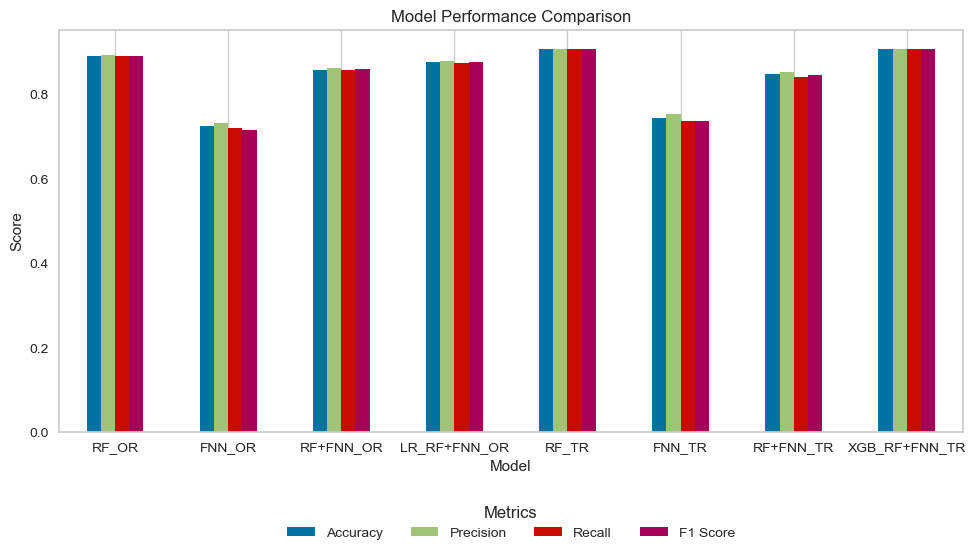

In [115]:
# Create DataFrame
df_metrics_all = pd.DataFrame(metrics_all)

# Set index for easier plotting
df_metrics_all.set_index('Model', inplace=True)

# Plotting
ax = df_metrics_all.plot(kind='bar', figsize=(10, 5))

#set labels and titles
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')

# rotate x-axis
plt.xticks(rotation=0)

#Add gridlines to y-axis
plt.grid(axis='y')

# Adjust layout for better spacing
plt.tight_layout()

#Move the legend below the x-axis
plt.legend(title='Metrics', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(df_metrics_all.columns))

#show plot
plt.show();

In [116]:
df_metrics_all

,Accuracy,Precision,Recall,F1 Score
Model,,,,
RF_OR,0.891626,0.892343,0.891548,0.891352
FNN_OR,0.724138,0.732130,0.719137,0.714497
RF+FNN_OR,0.857143,0.862861,0.856496,0.859026
LR_RF+FNN_OR,0.876847,0.879654,0.874677,0.876876
RF_TR,0.906404,0.905961,0.907784,0.906620
FNN_TR,0.743842,0.752284,0.737092,0.735748
RF+FNN_TR,0.847291,0.852645,0.840710,0.845366
XGB_RF+FNN_TR,0.906404,0.905961,0.907784,0.906620


***Observation on the results*** 
- Models trained on the transformed data outperformed those trained on the original data
- Random Forest with default parameters trained on the transformed data has the same result with xgb classifier with optimized parameter trained on the ensemble predictions of the Random Forest and FNN.

### 6.2. Further evaluation on the best two models

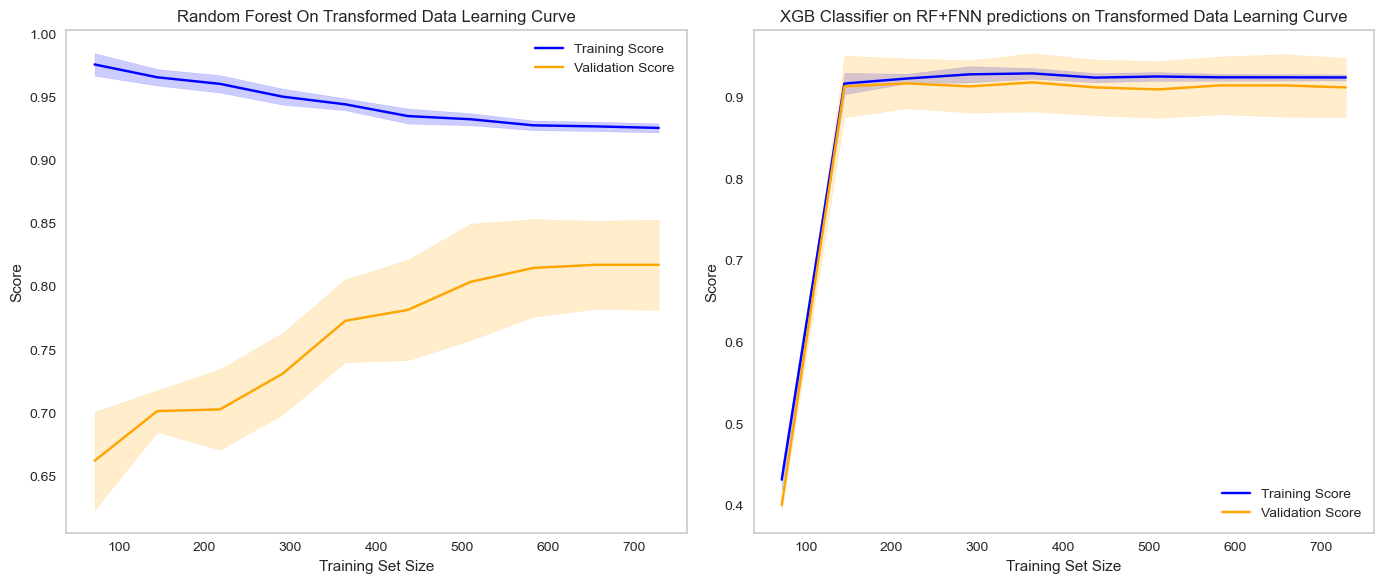

In [121]:
# plot their learning curve to understand how the models performed across different folds.

# Generate learning curves for Random Forest
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(rf_default, X_train_tr_sca, y_train_tr, 
                                                                cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), 
                                                                n_jobs=-1, 
                                                                train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Generate learning curves for Feedforward Neural Network
train_sizes_xgb, train_scores_xgb, val_scores_xgb = learning_curve(final_model_xgb, X_train_meta_tr,
                                                                   y_train_meta_tr,
                                                                   cv=StratifiedKFold(n_splits=10, 
                                                                                      shuffle=True, random_state=42), 
                                                                   n_jobs=-1, 
                                                                   train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and validation scores
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
val_mean_rf = np.mean(val_scores_rf, axis=1)
val_std_rf = np.std(val_scores_rf, axis=1)

train_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_std_xgb = np.std(train_scores_xgb, axis=1)
val_mean_xgb = np.mean(val_scores_xgb, axis=1)
val_std_xgb = np.std(val_scores_xgb, axis=1)

# Plotting the learning curves in subplots
plt.figure(figsize=(14, 6))

# Random Forest Learning Curve
plt.subplot(1, 2, 1)
plt.plot(train_sizes_rf, train_mean_rf, label='Training Score', color='blue')
plt.plot(train_sizes_rf, val_mean_rf, label='Validation Score', color='orange')
plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, color='blue', alpha=0.2)
plt.fill_between(train_sizes_rf, val_mean_rf - val_std_rf, val_mean_rf + val_std_rf, color='orange', alpha=0.2)
plt.title('Random Forest On Transformed Data Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# FNN Learning Curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes_xgb, train_mean_xgb, label='Training Score', color='blue')
plt.plot(train_sizes_xgb, val_mean_xgb, label='Validation Score', color='orange')
plt.fill_between(train_sizes_xgb, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb, color='blue', alpha=0.2)
plt.fill_between(train_sizes_xgb, val_mean_xgb - val_std_xgb, val_mean_xgb + val_std_xgb, color='orange', alpha=0.2)
plt.title('XGB Classifier on RF+FNN predictions on Transformed Data Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

***Observation on the plotted Learning Curve***
- Random Forest:  The steady increase in the CV score as more data is added shows that our model is generalizing well to unseen data. But the difference between the cv and training score is wide suggesting that our model is overfitting of the training set.
- XGB Classifer: The plot suggest that our cv score gradually learns the pattern and as some point, flattens out. This gradually learning which marches the training score shows that our model is robust and has no sign of overfitting or underfitting.

Hence our selected model for this study is a meta model(XGB) trained on the ensembled predictions of RF and FNN using the transformed data

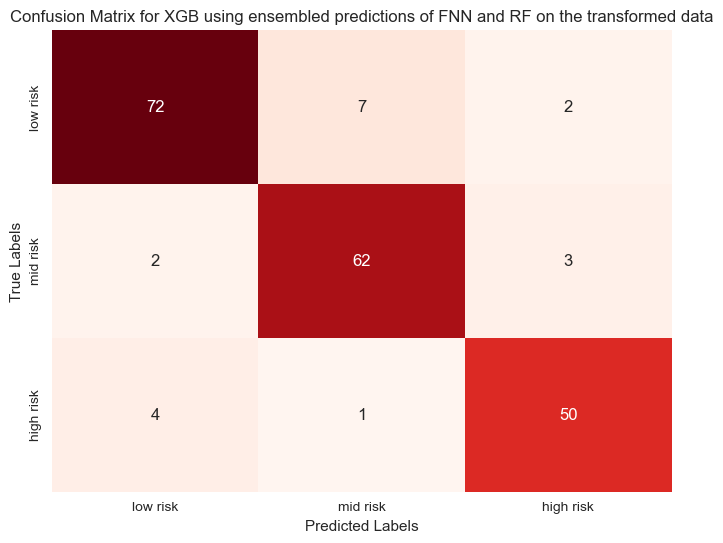

In [124]:
# Plot the confusion matrix of the final selected model

cm_xgb = confusion_matrix(y_test_tr, y_pred_xgb_tr)

# Plot the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=risk_map.keys(), yticklabels=risk_map.keys())
plt.title('Confusion Matrix for XGB using ensembled predictions of FNN and RF on the transformed data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

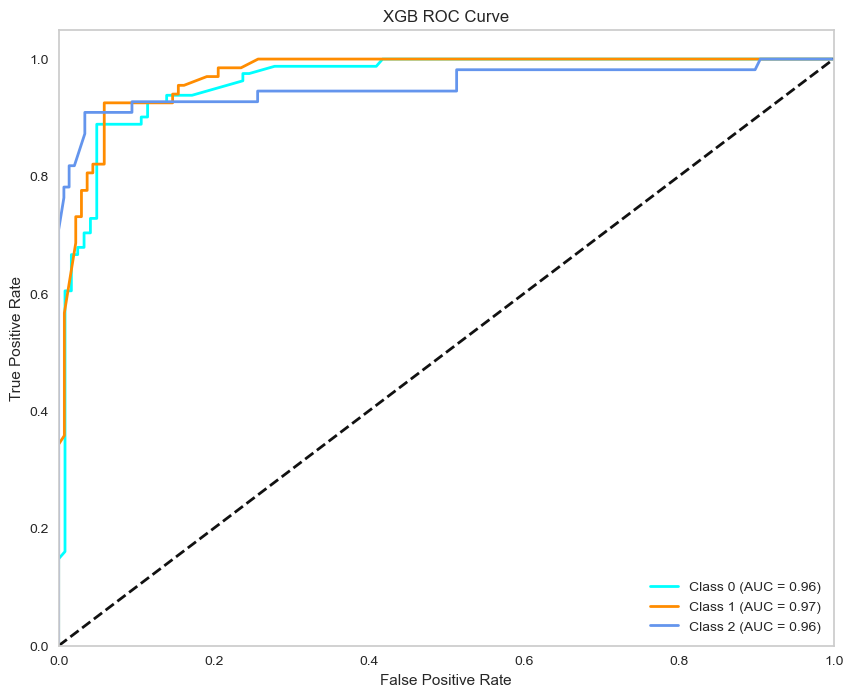

In [130]:
from itertools import cycle

# plot the ROC_AUC score
# Select probabilities for the positive class
xgb_prob = final_model_xgb.predict_proba(X_test_meta_tr)

# Binarize the output labels
y_test_tr_bin = label_binarize(y_test_tr, classes=np.unique(y_test_tr))
n_classes = y_test_tr_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_tr_bin[:, i], xgb_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
